In [252]:
import pandas as pd
import json
from dateutil.parser import parse
import datetime


In [253]:
#!pip install dateutils

In [254]:
file = 'Launcher/bin/Debug/PortfolioMixer.json'
#file = 'PortfolioMixer.json'

#data

In [255]:
def get_data(file):
    with open(file) as json_file:
        data = json.load(json_file)
    return data

In [256]:
def plot_backtest_chart(file, keys):
    data = get_data(file)
    graph_data = data['Charts']
    for k in keys:
        graph_data = graph_data[k]        
    dt = [[datetime.datetime.fromtimestamp(r['x']), r['y']] for r in graph_data['Values']]
    pd.DataFrame([d[1] for d in dt],columns=[ 'pnl'], index=[d[0] for d in dt]).plot(figsize=(15,5))
    

In [257]:
def plot_multi_backtest_chart(file, keyset):
    data = get_data(file)        
    df = None
    for keys in keyset:
        #print(keys)
        graph_data = data['Charts']
        for k in keys:
            graph_data = graph_data[k]        
        dt = [[datetime.datetime.fromtimestamp(r['x']), r['y']] for r in graph_data['Values']]
        if df is None:
            df = pd.DataFrame([d[1] for d in dt],columns=[k], index=[d[0] for d in dt])            
        else:
            df[k] = [d[1] for d in dt]    
    df.plot(figsize=(15,5))
    return df


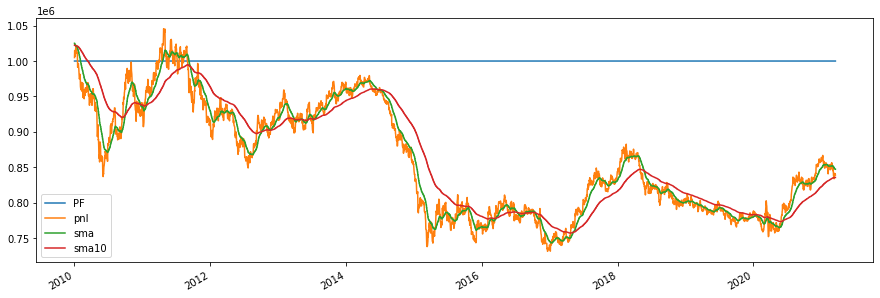

In [275]:
df = plot_multi_backtest_chart(file, [['algo','Series','PF'],['algo','Series','pnl'],['algo','Series','sma'], ['algo','Series','sma10']])

In [272]:
#df = plot_multi_backtest_chart(file, [['algo','Series','PF'],['algo','Series','pnl'],['algo','Series','sma'], ['algo','Series','sma10']])

In [273]:
#df = plot_multi_backtest_chart('PortfolioMixer-f1.json', [['algo','Series','PF'],['algo','Series','pnl'],['algo','Series','sma'], ['algo','Series','sma10']])

In [261]:
def plot_backtest_perf(file):
    plot_backtest_chart(file, ['Strategy Equity','Series','Equity'])    

data.keys()
dict_keys(['RollingWindow', 'TotalPerformance', 'AlphaRuntimeStatistics', 'Charts', 'Orders', 'ProfitLoss', 'Statistics', 'RuntimeStatistics'])

In [262]:
#data['TotalPerformance']

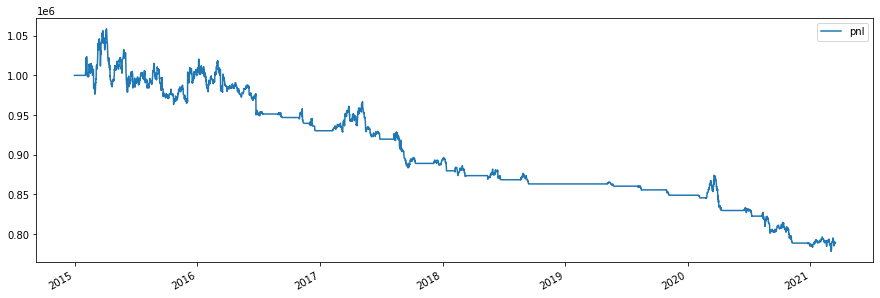

In [263]:
plot_backtest_perf(file)

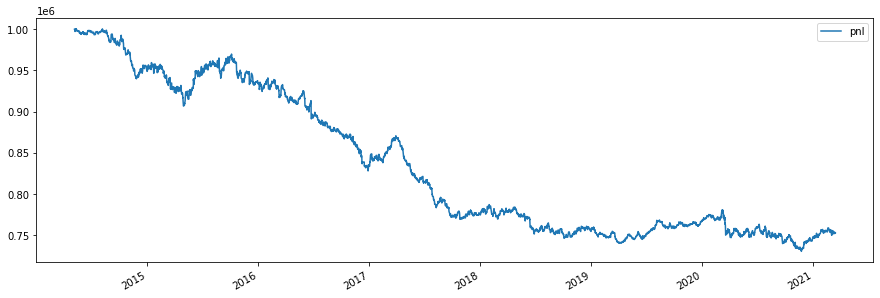

In [264]:
plot_backtest_perf('PortfolioMixer.json')

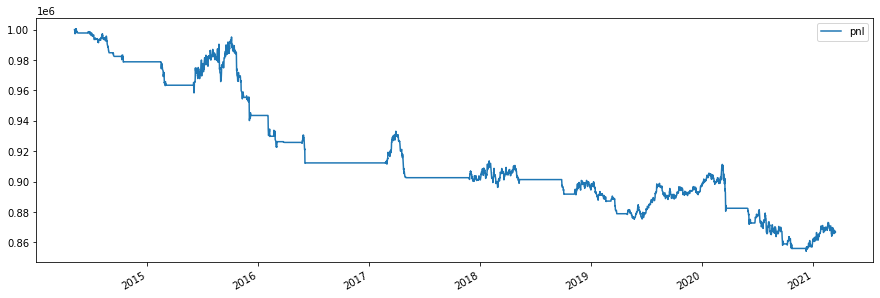

In [265]:
plot_backtest_perf('PortfolioMixer-f1.json')

In [266]:
len(data['Orders'])

1005

In [267]:
#[[x['Time'], x['Quantity']] for x in data['Orders'].values()]

In [268]:
data = get_data(file)

In [269]:

data['Charts'].keys()

dict_keys(['Benchmark', 'algo', 'Alpha Assets', 'Insight Count', 'Strategy Equity', 'Alpha'])

In [270]:
data['Charts']['algo']['Series'].keys()

dict_keys(['pnl', 'sma', 'sma10', 'PF'])